<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades-de-aprendizaje-Juan-sebastian-tellez-lopez/blob/main/Semana_6_Visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad visualización de datos de la semana 6**

**Maestría en Inteligencia Artificial Aplicada**

**Curso: Ciencia y analítica de datos**

**Tecnológico de Monterrey**

**Prof Maria de la Paz Rico Fdz** 

**Nombre del estudiante: Juan Sebastián Téllez López**

**Matrícula: A01793859** 

**Fecha: Octubre 28/2022**

# **1. Información general del conjunto de datos**

**Nombre del conjunto de datos:** Customers default payments in Taiwan

**Generado por:** Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

**Información general:** Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de incumplimiento estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Debido a que se desconoce la probabilidad real de incumplimiento, este estudio presentó el novedoso "Método de suavizado de clasificación" para estimar la probabilidad real de incumplimiento. Con la probabilidad real de incumplimiento como variable de respuesta (Y) y la probabilidad predictiva de incumplimiento como variable independiente (X), el resultado de la regresión lineal simple (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal artificial tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercana a cero y el coeficiente de regresión (B) a uno. Por lo tanto, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar con precisión la probabilidad real de incumplimiento.

# **2. Descripción del conjunto de datos**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 
* X7 = the repayment status in August, 2005; . . .;
* X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [21]:
input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv' #importamos dataset

In [22]:
import pandas as pd 
dfClients = pd.read_csv(input)
dfClients.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Renombramos las columnas para una mejor comprensión del dataset

In [23]:
da = df.rename(columns = {'X1' : 'Amount_Given',
                          'X2' : 'Gender',
                          'X3' : 'Education',
                          'X4' : 'Marital_Status',
                          'X5' : 'Age',
                          'X6' : 'Pay_September',
                          'X7' : 'Pay_August',
                          'X8' : 'Pay_July',
                          'X9' : 'Pay_June',
                          'X10': 'Pay_May',
                          'X11': 'Pay_April',
                          'X12': 'Amount_September',
                          'X13': 'Amount_August',
                          'X14': 'Amount_July',
                          'X15': 'Amount_June',
                          'X16': 'Amount_May',
                          'X17': 'Amount_April',  
                          'X18': 'A_Paid_September',
                          'X19': 'A_Paid_August',
                          'X20': 'A_Paid_July',
                          'X21': 'A_Paid_June',
                          'X22': 'A_Paid_May',
                          'X23': 'A_Paid_April',      
})
da.head(5) #Para visualizar los 5 primeros registros y darnos una idea general de los datos

,ID,Amount_Given,Gender,Education,Marital_Status,Age,Pay_September,Pay_August,Pay_July,Pay_June,...,Amount_June,Amount_May,Amount_April,A_Paid_September,A_Paid_August,A_Paid_July,A_Paid_June,A_Paid_May,A_Paid_April,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Calculamos el tamaño de nuestro dataset

In [24]:
da.shape

(30000, 25)

Con el metodo info consultamos la información general de los datos 

In [25]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30000 non-null  int64  
 1   Amount_Given      30000 non-null  int64  
 2   Gender            29999 non-null  float64
 3   Education         29998 non-null  float64
 4   Marital_Status    29998 non-null  float64
 5   Age               29995 non-null  float64
 6   Pay_September     29997 non-null  float64
 7   Pay_August        29995 non-null  float64
 8   Pay_July          29993 non-null  float64
 9   Pay_June          29991 non-null  float64
 10  Pay_May           29984 non-null  float64
 11  Pay_April         29986 non-null  float64
 12  Amount_September  29989 non-null  float64
 13  Amount_August     29989 non-null  float64
 14  Amount_July       29987 non-null  float64
 15  Amount_June       29985 non-null  float64
 16  Amount_May        29983 non-null  float6

In [26]:
da.dtypes

ID                    int64
Amount_Given          int64
Gender              float64
Education           float64
Marital_Status      float64
Age                 float64
Pay_September       float64
Pay_August          float64
Pay_July            float64
Pay_June            float64
Pay_May             float64
Pay_April           float64
Amount_September    float64
Amount_August       float64
Amount_July         float64
Amount_June         float64
Amount_May          float64
Amount_April        float64
A_Paid_September    float64
A_Paid_August       float64
A_Paid_July         float64
A_Paid_June         float64
A_Paid_May          float64
A_Paid_April        float64
Y                   float64
dtype: object

Revisamos valores nulos

In [27]:
da.isna().any()

ID                  False
Amount_Given        False
Gender               True
Education            True
Marital_Status       True
Age                  True
Pay_September        True
Pay_August           True
Pay_July             True
Pay_June             True
Pay_May              True
Pay_April            True
Amount_September     True
Amount_August        True
Amount_July          True
Amount_June          True
Amount_May           True
Amount_April         True
A_Paid_September     True
A_Paid_August        True
A_Paid_July          True
A_Paid_June          True
A_Paid_May           True
A_Paid_April         True
Y                    True
dtype: bool

In [28]:
da.loc[:,"Y"]

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
29995    0.0
29996    0.0
29997    1.0
29998    1.0
29999    1.0
Name: Y, Length: 30000, dtype: float64

Revisamos metricas generales

In [29]:
da.describe()

,ID,Amount_Given,Gender,Education,Marital_Status,Age,Pay_September,Pay_August,Pay_July,Pay_June,...,Amount_June,Amount_May,Amount_April,A_Paid_September,A_Paid_August,A_Paid_July,A_Paid_June,A_Paid_May,A_Paid_April,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# ***3. Limpieza de datos***

Para la limpieza de datos se propuso la siguiente estrategia.

* **Gender:** Dejar valor en 0 ya que no es un valor que podamos asumir por cuestiones éticas, por lo tanto, ese valor puede tomarse como no especificado.
*	**Education:** Dejar valor en 4, especificado en la descripción de los datos como otro, en lo cual puede catalogarse como sin escolaridad o estudios informales.
*	**Marital_Status:** Dejar valor en 3, especificado en la descripción de los datos como otro, ya que puede encontrarse en unión libre, viudo/a, o cualquier otro tipo de relación.
*	**Age:** Se utilizará la mediana para calcular en que posible rango de edad se encuentra la persona.
*	**Pay (Sep,Aug,July,June,May,April):** Se dejarán en 0 en caso de que no se tenga información, debido a que no podemos manipular información registrada por el sistema histórico de transacciones bancario y no sería correcto asumir un valor en el cual la persona pueda quedar como "En deuda", o "Al día", ya que desconocemos a detalle el perfil del cliente.
*	**Amount (Sep,Aug,July,June,May,April):** Los datos faltantes se dejaran como la mediana de los pagos realizados, teniendo en cuenta que más adelante puede realizarse un análisis más a detalle para indagar si las razones de no tener datos de un mes del estado de la cuenta pueda deberse a un fallo en la recolección de los datos, o que el cliente termino de pagar su deuda y al mes siguiente adquirido un nuevo crédito o tuvo un cobro adicional.
*	**A_Paid (Sep,Aug,July,June,May,April):** Similar al caso anterior, los datos faltantes se calcularan en este caso con la media de los pagos anteriores, teniendo en cuenta que más adelante podría analizarse en profundidad si el cliente no registra pagos debido a algún incentivo o exoneración del pago para dichos meses, esto va muy de la mano con las estrategias de retención para evitar el Churn.
*	**Y:** Al ser esta la variable de salida, en caso de que su valor sea nulo, podría tomarse como 0, ya que, en la descripción del dataset se menciona "credible or not credible clients", lo cual puede tomarse como 1 para el primer caso y 0 para el segundo, por lo tanto, no podemos asumir que un cliente es creíble, ya que posiblemente si ese campo no tiene valor es debido a que los modelos de IA aplicados no pudieron concluir apropiadamente este dato, y tampoco nosotros (por el momento).
*	Para el caso de las filas donde falte más del 50% de la información, se procederá a eliminar del dataset, ya que es información que no afecta la naturaleza del mismo al ser incompleta.

Eliminar filas donde falte mas del 50% de la información 

In [30]:
da.dropna(thresh=13, inplace = True) 
da

,ID,Amount_Given,Gender,Education,Marital_Status,Age,Pay_September,Pay_August,Pay_July,Pay_June,...,Amount_June,Amount_May,Amount_April,A_Paid_September,A_Paid_August,A_Paid_July,A_Paid_June,A_Paid_May,A_Paid_April,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


**En total solo fueron eliminados 8 Filas que cumplian con dicha condición, lo cual equivale a un 0.03% de los datos.**

**Para los valores que serán reemplazados por 0 Gender y Pay(Sep,Aug,July,June,May,April).**

In [31]:
da['Gender'].fillna(value = 0, inplace = True)
da['Pay_September'].fillna(value = 0, inplace = True)
da['Pay_August'].fillna(value = 0, inplace = True)
da['Pay_July'].fillna(value = 0, inplace = True)
da['Pay_June'].fillna(value = 0, inplace = True)
da['Pay_May'].fillna(value = 0, inplace = True)
da['Pay_April'].fillna(value = 0, inplace = True)
da['Y'].fillna(value = 0, inplace = True)

**Para Education, donde el valor se cambiará a 4.**

In [82]:
da['Education'].fillna(value = 4, inplace = True)

**Para Edad y Amount(Sep,Aug,July,June,May,April), los cual se completara con la mediana.**

In [33]:
da['Age'].fillna(value = da.Age.median(), inplace = True)
da['Amount_September'].fillna(value = da.Amount_September.median(), inplace = True)
da['Amount_August'].fillna(value = da.Amount_September.median(), inplace = True)
da['Amount_July'].fillna(value = da.Amount_September.median(), inplace = True)
da['Amount_June'].fillna(value = da.Amount_September.median(), inplace = True)
da['Amount_May'].fillna(value = da.Amount_September.median(), inplace = True)
da['Amount_April'].fillna(value = da.Amount_September.median(), inplace = True)

**Para Paid(Sep,Aug,July,June,May,April) se completaran con la media.**

In [34]:
da['A_Paid_September'].fillna(value = da.Amount_September.mean(), inplace = True)
da['A_Paid_August'].fillna(value = da.Amount_September.mean(), inplace = True)
da['A_Paid_July'].fillna(value = da.Amount_September.mean(), inplace = True)
da['A_Paid_June'].fillna(value = da.Amount_September.mean(), inplace = True)
da['A_Paid_May'].fillna(value = da.Amount_September.mean(), inplace = True)
da['A_Paid_April'].fillna(value = da.Amount_September.mean(), inplace = True)

**Confirmamos que no tengamos datos vacios**

In [35]:
da.isna().any()

ID                  False
Amount_Given        False
Gender              False
Education           False
Marital_Status      False
Age                 False
Pay_September       False
Pay_August          False
Pay_July            False
Pay_June            False
Pay_May             False
Pay_April           False
Amount_September    False
Amount_August       False
Amount_July         False
Amount_June         False
Amount_May          False
Amount_April        False
A_Paid_September    False
A_Paid_August       False
A_Paid_July         False
A_Paid_June         False
A_Paid_May          False
A_Paid_April        False
Y                   False
dtype: bool

In [37]:
da.isnull().sum()

ID                  0
Amount_Given        0
Gender              0
Education           0
Marital_Status      0
Age                 0
Pay_September       0
Pay_August          0
Pay_July            0
Pay_June            0
Pay_May             0
Pay_April           0
Amount_September    0
Amount_August       0
Amount_July         0
Amount_June         0
Amount_May          0
Amount_April        0
A_Paid_September    0
A_Paid_August       0
A_Paid_July         0
A_Paid_June         0
A_Paid_May          0
A_Paid_April        0
Y                   0
dtype: int64

# **Partes 4 - 5 - 6 - 7**

## **4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [38]:
da.describe()

,ID,Amount_Given,Gender,Education,Marital_Status,Age,Pay_September,Pay_August,Pay_July,Pay_June,...,Amount_June,Amount_May,Amount_April,A_Paid_September,A_Paid_August,A_Paid_July,A_Paid_June,A_Paid_May,A_Paid_April,Y
count,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,...,29992.000000,29992.000000,29992.000000,29992.000000,2.999200e+04,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000
mean,14997.713590,167490.653508,1.603894,1.853061,1.551981,35.483062,-0.016671,-0.133669,-0.166511,-0.220792,...,43270.777007,40319.111296,38880.078087,5664.601260,5.925662e+03,5227.276206,4833.432446,4806.615061,5221.757333,0.221159
std,8658.975652,129738.484323,0.489095,0.790339,0.521965,9.217755,1.123729,1.197191,1.195928,1.169048,...,64338.781680,60801.653847,59559.467109,16566.238344,2.304675e+04,17610.414576,15677.130478,15289.468026,17785.574016,0.415034
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.750000,1767.250000,1256.750000,1000.000000,8.357500e+02,390.000000,296.750000,252.500000,118.000000,0.000000
50%,14997.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19058.000000,18121.000000,17086.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22495.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54537.750000,50190.500000,49206.750000,5006.000000,5.000000e+03,4507.000000,4014.250000,4037.750000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## **5. Realiza el conteo de las variables categóricas**

Vamos a determinar como estan correlacionadas nuestras variables, y nos fijaremos en los pagos facturados, idealmente estos deberán coincidir con los montos montos facturados y también los pagos del mes en curso.

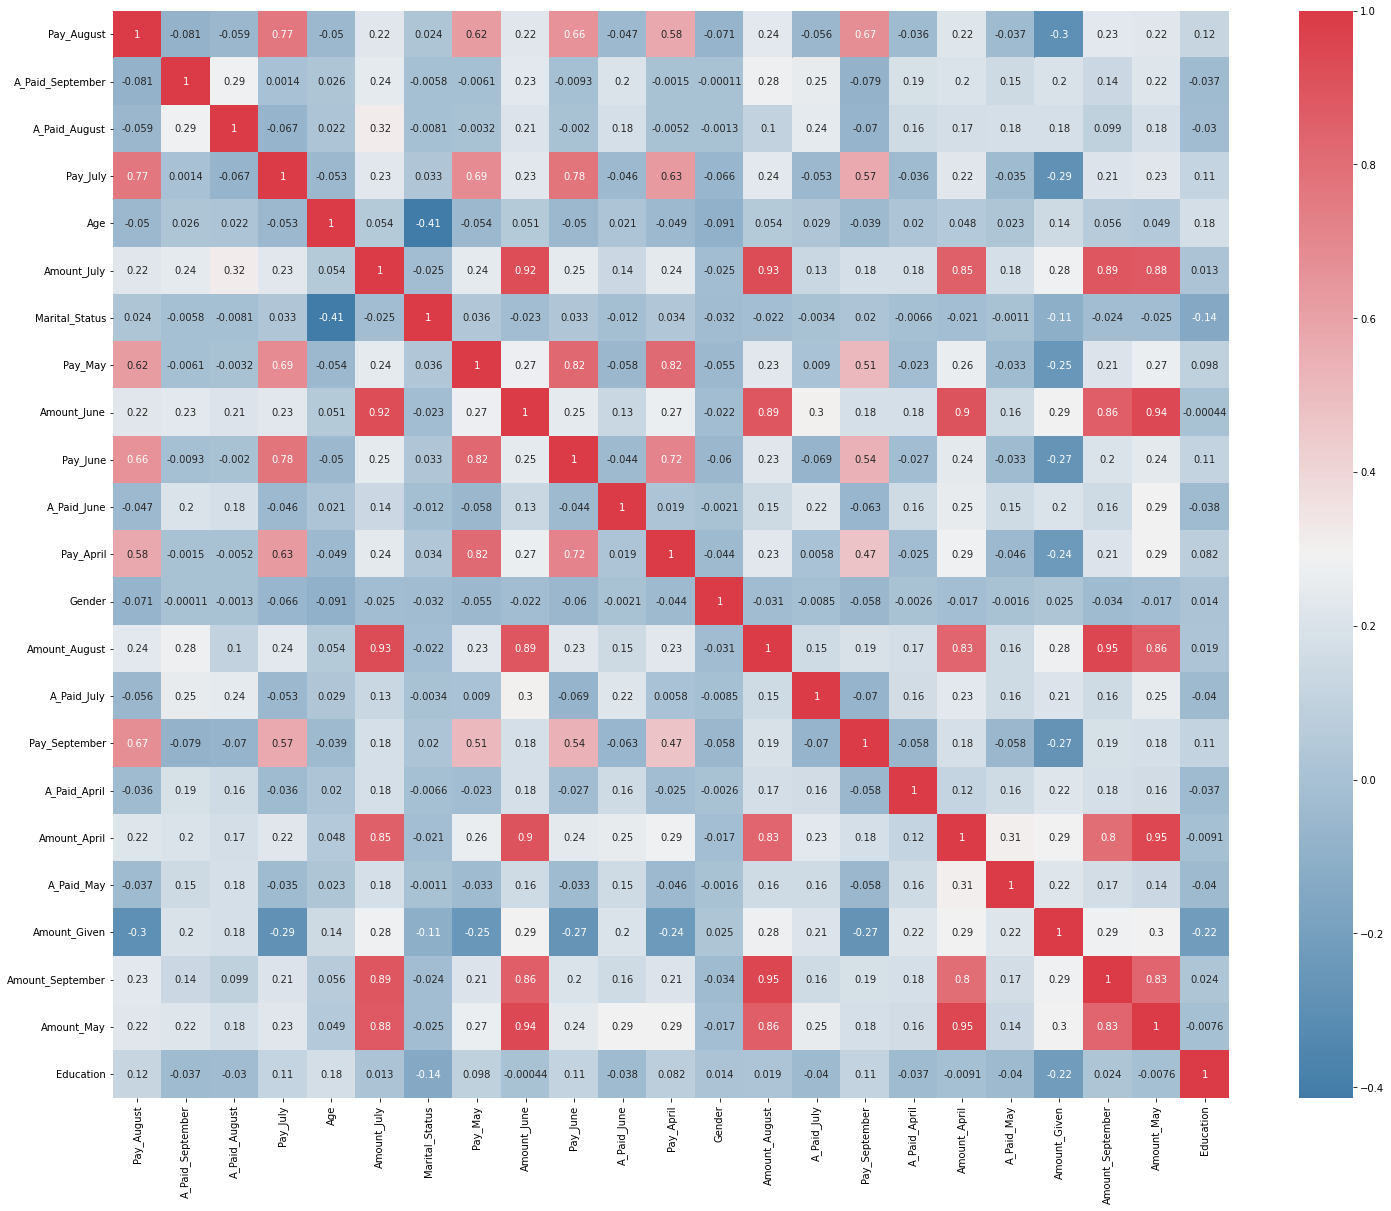

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
featureLabels={'Amount_Given','Gender','Education','Marital_Status','Age','Pay_September','Pay_August','Pay_July','Pay_June','Pay_May','Pay_April','Amount_September','Amount_August','Amount_July','Amount_June','Amount_May','Amount_April',  'A_Paid_September','A_Paid_August','A_Paid_July','A_Paid_June','A_Paid_May','A_Paid_April'}
yValue=pd.Series(da.loc[:,"Y"])
dfClientFeatures=pd.DataFrame(da,columns=featureLabels)
xValue=dfClientFeatures
fig = plt.figure(figsize=(25, 20))

sns.heatmap(dfClientFeatures.corr(), annot=True,cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True))

Por otro lado, observemos los valores atípicos

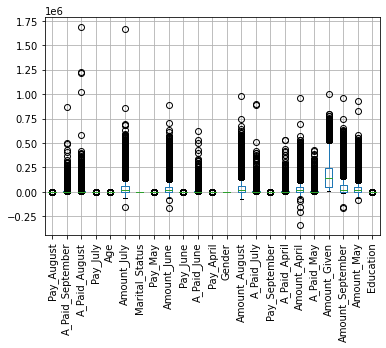

In [40]:
xValue.boxplot(rot=90)

## **6. Escalar y normalizar datos**

Normalizando los valores atípicos

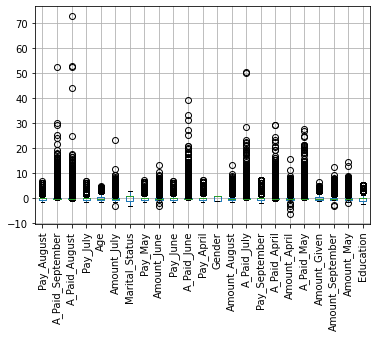

In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_scaled = sc.fit_transform(xValue)
pd.DataFrame(X_scaled,columns=featureLabels).boxplot(rot=90)

In [43]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([X_scaled[:,14]])
print(normalized_arr.shape)
print(X_scaled[:,14].shape)

(1, 29992)
(29992,)


In [44]:
yValue

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
29995    0.0
29996    0.0
29997    1.0
29998    1.0
29999    1.0
Name: Y, Length: 29992, dtype: float64

## **7. Reduce las dimensiones con PCA**

### **7.1 Ahora vamos a observar la varianza acomulada**

Eigenvalues:
[6.54303486 4.09737345 1.55161192 1.47233357 1.02534735 0.95724724
 0.90784498 0.88760808 0.87095134 0.78281268 0.7326679  0.68330017
 0.57086831 0.52455364 0.40386719 0.25978048 0.24925397 0.18890115
 0.13186508 0.0701922  0.04080858 0.02531801 0.02322474]

Variances (Percentage):
[28.44702914 17.81407318  6.74591384  6.40123687  4.45788332  4.16180576
  3.94702047  3.85903689  3.78661868  3.40341992  3.18540639  2.97077125
  2.48195338  2.28059195  1.75588577  1.12944267  1.08367677  0.82128198
  0.57330734  0.30517332  0.17742269  0.11007464  0.10097379]



Text(0, 0.5, 'Explained variance (%)')

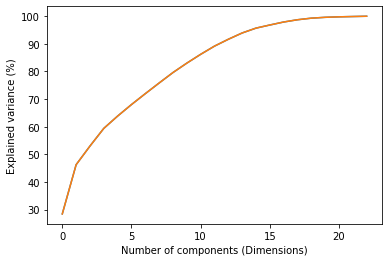

In [45]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_scaled = sc.fit_transform(xValue)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

### **7.2 Indica la importancia de las variables en cada componente**

Text(204.0, 0.5, 'Explained variance (%)')

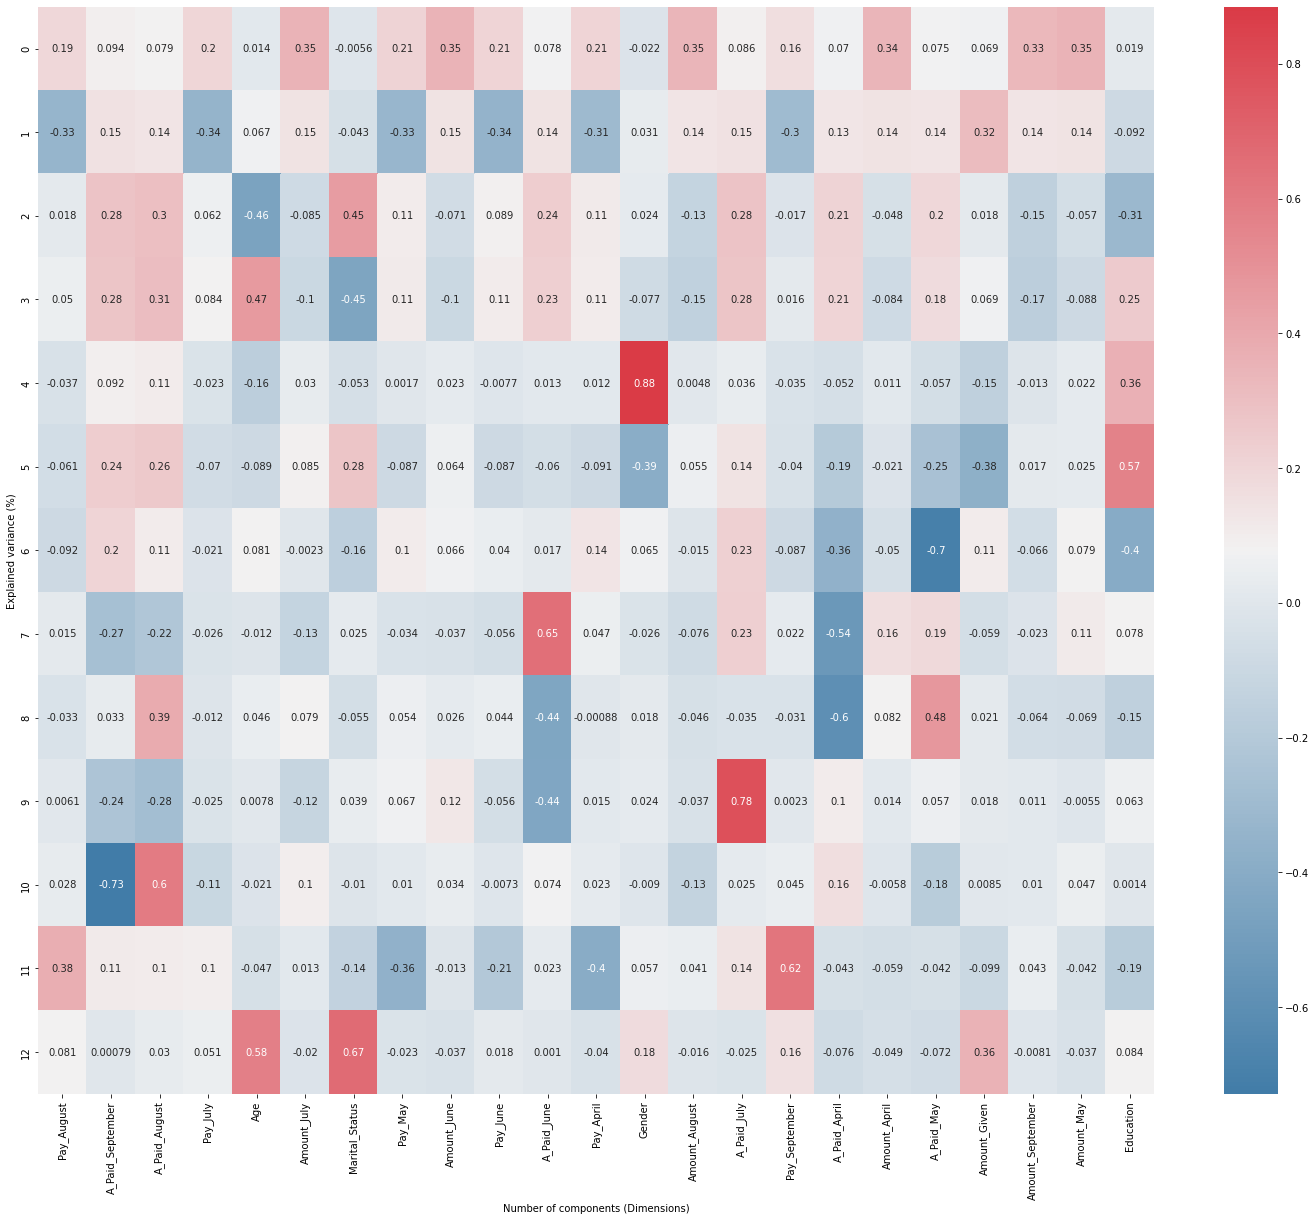

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(xValue)

from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.scale(xValue),columns = xValue.columns) 

# Alicar PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
X_pca = pca.fit_transform(data_scaled)

# Obtener el dataset transformado
X_pca = pd.DataFrame(X_pca)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
fig = plt.figure(figsize=(25, 20))
cmap=sns.diverging_palette(240, 10, n=9,as_cmap=True)
sns.heatmap(pd.DataFrame(pca.components_,columns=data_scaled.columns), annot=True,cmap=cmap)

values=(pd.DataFrame(pca.components_,columns=data_scaled.columns).abs().max().sort_values(ascending = False))
(values)


plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Observamos que el genero es de las variables mas influyentes en los PCA

In [130]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29992 entries, 0 to 29991
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       29992 non-null  float64
 1   1       29992 non-null  float64
 2   2       29992 non-null  float64
 3   3       29992 non-null  float64
 4   4       29992 non-null  float64
 5   5       29992 non-null  float64
 6   6       29992 non-null  float64
 7   7       29992 non-null  float64
 8   8       29992 non-null  float64
 9   9       29992 non-null  float64
 10  10      29992 non-null  float64
 11  11      29992 non-null  float64
 12  12      29992 non-null  float64
dtypes: float64(13)
memory usage: 3.0 MB


# **8. Elabora los histogramas de los atributos para visualizar su distribución**

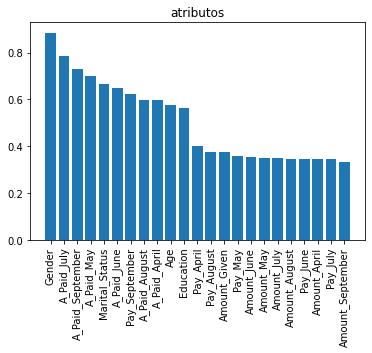

In [47]:
plt.bar(values.index,values)
plt.title('atributos')
plt.xticks(rotation = 90)
plt.show()

Observamos que genero tiene mayor importancia y facturación de septiembre 2005 tiene la menor, aunque también observamos tendencia en los pagos de Julio y Septiembre, y respecto al estado marital, sin dejar a un lado la edad y la educación que tienen valores de distribución muy similares.

(array([1.2493e+04, 7.8790e+03, 5.0580e+03, 2.7590e+03, 1.5970e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <a list of 10 Patch objects>)

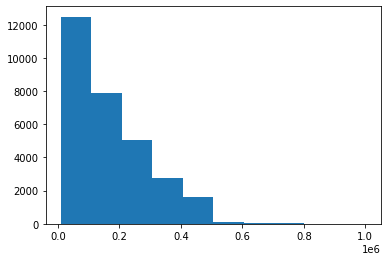

In [141]:
plt.hist(da['Amount_Given'])

(array([11880.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18112.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

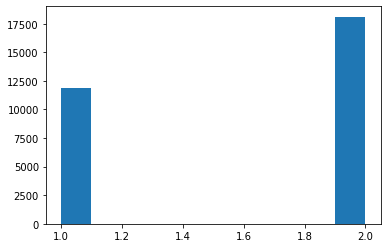

In [142]:
plt.hist(da['Gender'])

(array([1.4000e+01, 1.0583e+04, 0.0000e+00, 1.4027e+04, 0.0000e+00,
        4.9140e+03, 1.2300e+02, 0.0000e+00, 2.8000e+02, 5.1000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

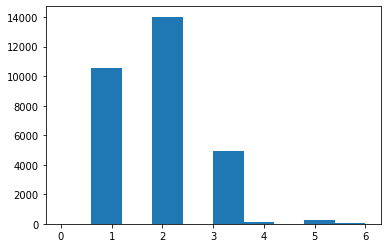

In [143]:
plt.hist(da['Education'])

(array([   54.,     0.,     0., 13652.,     0.,     0., 15963.,     0.,
            0.,   323.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

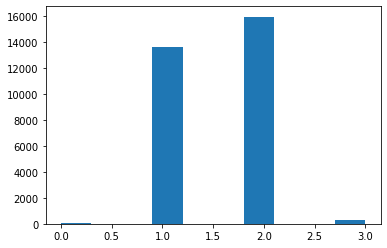

In [144]:
plt.hist(da['Marital_Status'])

(array([5.127e+03, 8.260e+03, 6.515e+03, 4.808e+03, 2.602e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

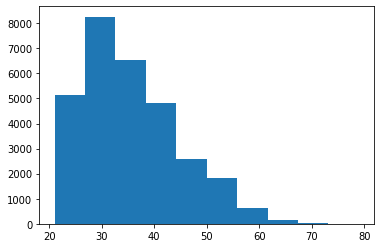

In [145]:
plt.hist(da['Age'])

(array([2.7580e+03, 5.6830e+03, 1.4735e+04, 3.6880e+03, 2.6650e+03,
        3.2200e+02, 7.6000e+01, 2.6000e+01, 1.1000e+01, 2.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

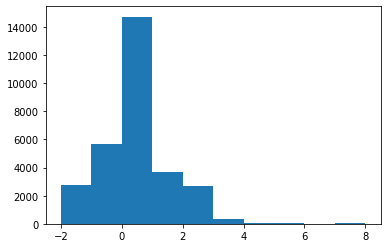

In [146]:
plt.hist(da['Pay_September'])

(array([3.7810e+03, 6.0460e+03, 1.5728e+04, 2.8000e+01, 3.9260e+03,
        3.2600e+02, 9.9000e+01, 2.5000e+01, 1.2000e+01, 2.1000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

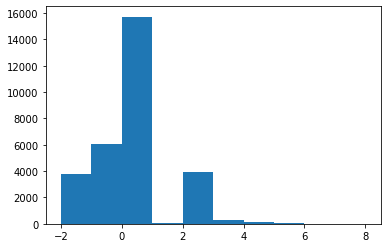

In [147]:
plt.hist(da['Pay_August'])

(array([4.0850e+03, 5.9340e+03, 1.5763e+04, 4.0000e+00, 3.8170e+03,
        2.4000e+02, 7.6000e+01, 2.1000e+01, 2.3000e+01, 2.9000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

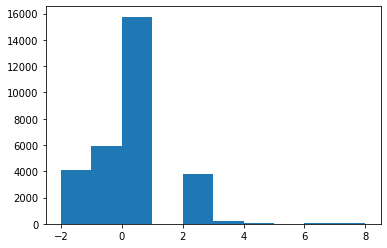

In [148]:
plt.hist(da['Pay_July'])

(array([4.3480e+03, 5.6830e+03, 1.6454e+04, 2.0000e+00, 3.1560e+03,
        1.8000e+02, 6.9000e+01, 3.5000e+01, 5.0000e+00, 6.0000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

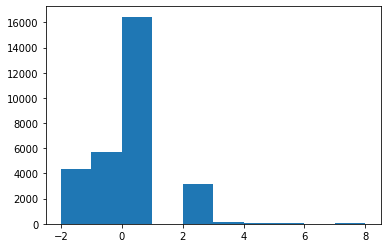

In [149]:
plt.hist(da['Pay_June'])

(array([4.5460e+03, 5.5350e+03, 1.6946e+04, 0.0000e+00, 2.6230e+03,
        1.7800e+02, 8.4000e+01, 1.7000e+01, 4.0000e+00, 5.9000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

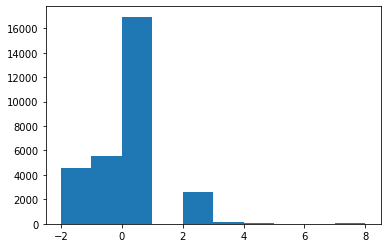

In [150]:
plt.hist(da['Pay_May'])

(array([4.8950e+03, 5.7350e+03, 1.6285e+04, 0.0000e+00, 2.7640e+03,
        1.8400e+02, 4.9000e+01, 1.3000e+01, 1.9000e+01, 4.8000e+01]),
 array([-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Patch objects>)

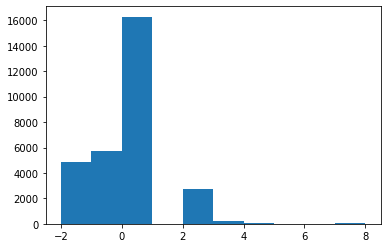

In [151]:
plt.hist(da['Pay_April'])

(array([2.0000e+00, 2.1877e+04, 6.0070e+03, 1.5340e+03, 3.9700e+02,
        1.4300e+02, 2.7000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-165580. ,  -52570.9,   60438.2,  173447.3,  286456.4,  399465.5,
         512474.6,  625483.7,  738492.8,  851501.9,  964511. ]),
 <a list of 10 Patch objects>)

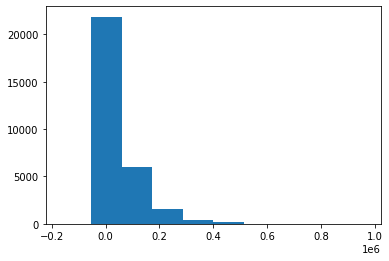

In [152]:
plt.hist(da['Amount_September'])

(array([1.8117e+04, 9.0380e+03, 2.0380e+03, 5.3400e+02, 1.9000e+02,
        6.2000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-69777. ,  35593.8, 140964.6, 246335.4, 351706.2, 457077. ,
        562447.8, 667818.6, 773189.4, 878560.2, 983931. ]),
 <a list of 10 Patch objects>)

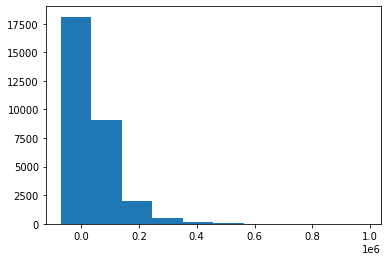

In [153]:
plt.hist(da['Amount_August'])

(array([1.6185e+04, 1.2671e+04, 9.8500e+02, 1.4000e+02, 9.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-157264. ,   24871.3,  207006.6,  389141.9,  571277.2,  753412.5,
         935547.8, 1117683.1, 1299818.4, 1481953.7, 1664089. ]),
 <a list of 10 Patch objects>)

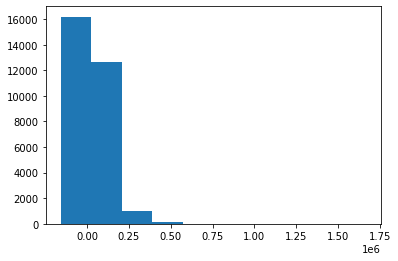

In [154]:
plt.hist(da['Amount_July'])

(array([3.0000e+00, 2.0533e+04, 7.3630e+03, 1.5510e+03, 3.8700e+02,
        1.1600e+02, 3.5000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-170000. ,  -63841.4,   42317.2,  148475.8,  254634.4,  360793. ,
         466951.6,  573110.2,  679268.8,  785427.4,  891586. ]),
 <a list of 10 Patch objects>)

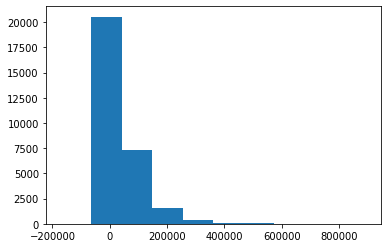

In [155]:
plt.hist(da['Amount_June'])

(array([1.5889e+04, 1.1263e+04, 2.1770e+03, 4.7500e+02, 1.3300e+02,
        4.8000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-81334. ,  19516.5, 120367. , 221217.5, 322068. , 422918.5,
        523769. , 624619.5, 725470. , 826320.5, 927171. ]),
 <a list of 10 Patch objects>)

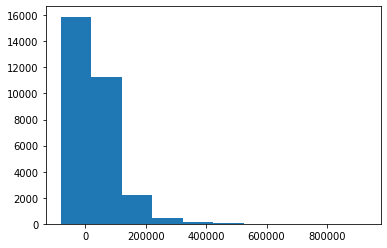

In [156]:
plt.hist(da['Amount_May'])

(array([1.0000e+00, 3.0000e+00, 2.2811e+04, 6.0450e+03, 9.4000e+02,
        1.6000e+02, 3.0000e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-339603. , -209476.3,  -79349.6,   50777.1,  180903.8,  311030.5,
         441157.2,  571283.9,  701410.6,  831537.3,  961664. ]),
 <a list of 10 Patch objects>)

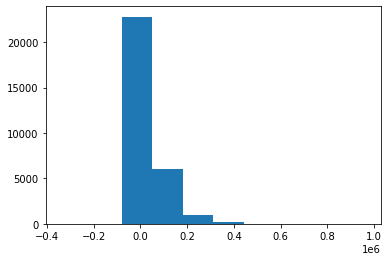

In [157]:
plt.hist(da['Amount_April'])

(array([2.9794e+04, 1.4200e+02, 4.1000e+01, 9.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  87355.2, 174710.4, 262065.6, 349420.8, 436776. ,
        524131.2, 611486.4, 698841.6, 786196.8, 873552. ]),
 <a list of 10 Patch objects>)

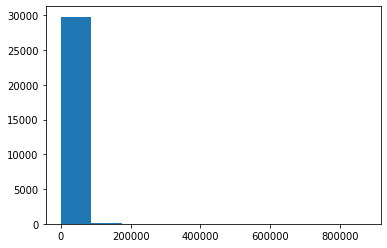

In [158]:
plt.hist(da['A_Paid_September'])

(array([2.9912e+04, 6.4000e+01, 1.1000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0. ,  168425.9,  336851.8,  505277.7,  673703.6,  842129.5,
        1010555.4, 1178981.3, 1347407.2, 1515833.1, 1684259. ]),
 <a list of 10 Patch objects>)

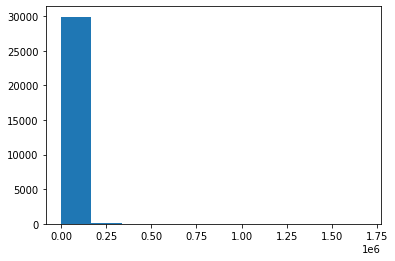

In [159]:
plt.hist(da['A_Paid_August'])

(array([2.9771e+04, 1.7200e+02, 2.9000e+01, 1.2000e+01, 5.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([     0.,  89604., 179208., 268812., 358416., 448020., 537624.,
        627228., 716832., 806436., 896040.]),
 <a list of 10 Patch objects>)

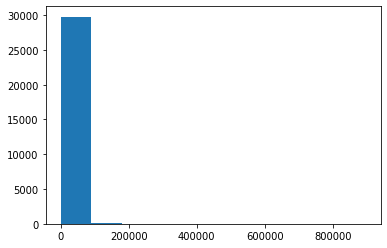

In [160]:
plt.hist(da['A_Paid_July'])

(array([2.9666e+04, 2.2700e+02, 6.1000e+01, 2.0000e+01, 9.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([     0.,  62100., 124200., 186300., 248400., 310500., 372600.,
        434700., 496800., 558900., 621000.]),
 <a list of 10 Patch objects>)

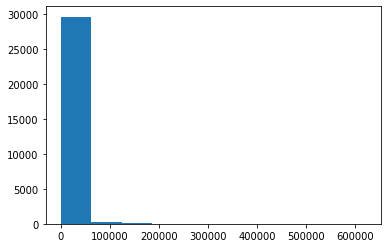

In [161]:
plt.hist(da['A_Paid_June'])

(array([2.9479e+04, 2.9700e+02, 1.1900e+02, 4.5000e+01, 2.7000e+01,
        8.0000e+00, 4.0000e+00, 9.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([     0. ,  42652.9,  85305.8, 127958.7, 170611.6, 213264.5,
        255917.4, 298570.3, 341223.2, 383876.1, 426529. ]),
 <a list of 10 Patch objects>)

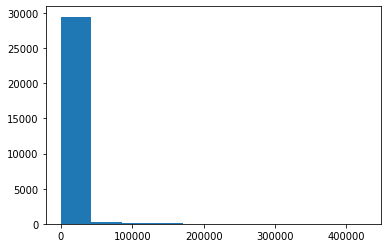

In [162]:
plt.hist(da['A_Paid_May'])

(array([2.9505e+04, 2.8900e+02, 9.3000e+01, 7.0000e+01, 1.9000e+01,
        7.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([     0. ,  52866.6, 105733.2, 158599.8, 211466.4, 264333. ,
        317199.6, 370066.2, 422932.8, 475799.4, 528666. ]),
 <a list of 10 Patch objects>)

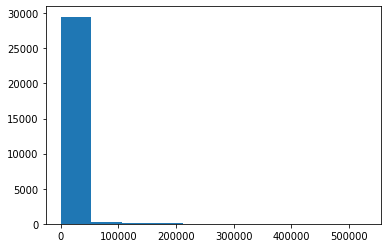

In [163]:
plt.hist(da['A_Paid_April'])

(array([23359.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6633.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

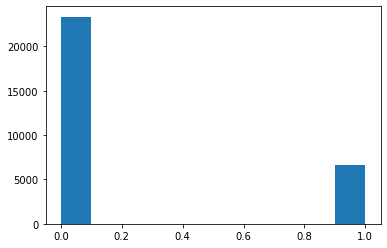

In [175]:
da['Y'].value_counts()
plt.hist(da['Y'])

# **9 - 10. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones**

Para este punto se graficaran los datos mas reelevantes, como en este caso serían los montos ofrecidos, genero, edad, estado marital, educación 

In [101]:
import matplotlib.pyplot as plt #librerias para graficar
import seaborn as sns
import numpy as np

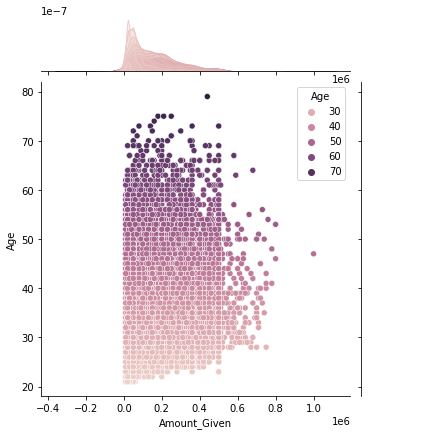

In [65]:
sns.jointplot(data=da, x=da['Amount_Given'], y=da['Age'], hue=da['Age'], kind='scatter', palette=None)

Para la primer variable Amount_Given, quise representarlo por medio de un jointplot, el cual nos representa la distribución de los montos asignados respecto a la edad, donde observamos que no importa la edad que se tenga no hay correlación fuerte para relacionar estas dos variables.

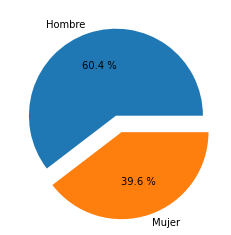

In [73]:
explode = (0,0.2)
plt.pie(da['Gender'].value_counts(),labels=["Hombre","Mujer"], explode = explode, autopct="%0.1f %%")
plt.show()

El grafico de pie, encaja perfectamente para representar el genero, teniendo en cuenta que el indefinido no se tuvo en cuenta para esta representación. Podemos observar que el porcentaje de hombres es bastante superior al de las mujeres, y adicionalmente al graficar se añadio la propiedad explode para separar la pieza del pie con la intención de mostrar mayor contraste. 

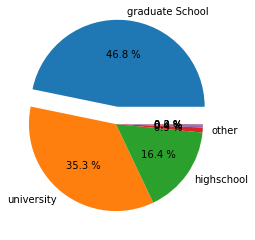

In [107]:
explode = (0.2,0,0,0,0,0,0)
plt.pie(da['Education'].value_counts(),labels=["graduate School","university","highschool","other","","",""], explode = explode, autopct="%0.1f %%")
plt.show()

Casí la mitad de los clientes al menos son graduados de secundaria, aunque una tercera parte se encuentran cursando o ya culminaron sus estudios universitarios, mientras que otro pequeño porcentaje, tiene otro tipo de educación (Informal, empirica, etc).

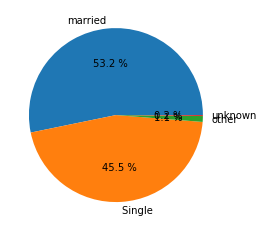

In [118]:
plt.pie(da['Marital_Status'].value_counts(),labels=["married","Single ","other","unknown"], autopct="%0.1f %%")
plt.show()

Es bastante equilibrada la cantidad de personas que estan casadas o solteras, lo cual nos serviria para realizar más adelante un perfilamiento del tipo de cliente. 

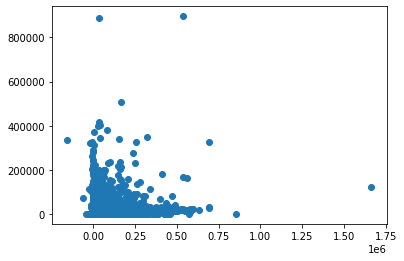

In [135]:
plt.scatter(da['Amount_July'], da['A_Paid_July'], cmap=None)

Aquí podemos observar el pago en julio vs el monto del mismo mes, donde evidenciamos que los clientes tienden a realizar pagos altos respecto a su monto. 

(array([5.127e+03, 8.260e+03, 6.515e+03, 4.808e+03, 2.602e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

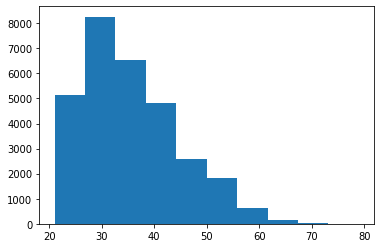

In [140]:
plt.hist(da['Age'])

Por ultimo, mediante este histograma observamos que la distribución de los datos indica que la mayoría de las personas tienen entre 30 y 40 años. 

# **Comentarios finales**

Esta practica me permitio afianzar el proceso de tranformación y gestión de los datos, mediante tecnicas que permitieran limpiar el dataset y observar caracteristicas importantes del mismo, a partir de sus metricas, distribución y el PCA, si bien para este caso la información estaba relativamente completa y sencilla, encontre un poco dificil interpretar la manera de graficarla, ya que en cuanto a la correlación de las variables, realmente no pude encontrar relaciones fuertes entre ellas, sino que mas bién teniendo en cuenta los histogramas y distribución pude darme cuenta de lo siguiente:

* Los montos datos principalmente rondan los 12000, lo cual indica un movimiento financiero grande y posiblemente una oportunidad para generar ganancias con los intereses cobrados. 
* En cuanto a los generos no hay mayor variación ya que hay cantidades similares entre hombres (más) y mujeres (menos).
* En cuanto al nivel educativo encontramos que gran mayoría culmino sus estudios escolares de bachillerato o high school, y una tercera parte se encuentra cursando o ya finalizo sus estudios universitarios, lo cual permitiría un acercamiento a ellos sobre tecnicas financieras y cuidado de la vida crediticia. 
* En cuanto al estado civil, tanto personas que estan en una relación tienen proporción similar a los solteros, lo cual permitiria una segmentación de cliente con aproximaciones y beneficios dependiendo su condición. 
* El rango de edad mayoritariamente se encuentra entre los 30-40 años, lo cual también nos aporta a esa caracterización del cliente. 
* En cuanto a los pagos entre abril - septiembre, es evidente una tendencia a un valor de 16000. 
* En cuanto a nuestra variable de salida se observa que de 30000 clientes tan solo 5000 serían clientes con credibilidad, lo cual es bastante bajo (16.6%)